# **Principal Component Analysis (PCA)**

## **What will you learn?**
1. **Summary:** Eigen Analysis
2. **PCA on Images**: Why use PCA with images?
3. **Example 1** : PCA on Olivetti Images.
4. **Example 2** : PCA on Digits Dataset.
5. **Eigenfaces**
6. **PCA for Image Compression**


## **PCA, the instance of the Eigen-Analysis**

1. PCA seeks to represent observations (or signals, images, and general data) in a form that enhances the mutual independence of contributory components.

2. One observation is assumed to be a point in a p-dimensional linear space.

3. This linear space has some ‘natural’ orthogonal basis vectors. It is of advantage to express observation as a linear combination with regards to this ‘natural’ base (given by eigen-vectors as we will see later).

4. PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

## **PCA on Images**

PCA is applied on images for a number of reasons. They are:

**Number of features:** Images have huge number of features. Even a small image of 28 x 28 pixels will have 784 features to deal with.

**Lot of Covariance:** When you look at an image, it is easy to understand that if we have the values for one pixel 'p', the pixels in the vicinity of 'p' will generally have similar values.

Other fundamental reasons to apply PCA are that it **reduces memory consumption and time taken.**

## **Example : Olivetti Images**

Let us see how we can actually apply PCA on images. We will be using the Olivetti Images dataset here.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
olive = datasets.fetch_olivetti_faces()       # Downloading the Dataset
olive.keys()


dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
olive['data'].shape

(400, 4096)

Data contains flattenned images. Hence it is a 2D List

In [ ]:
olive['images'].shape

(400, 64, 64)

Now, we will plot these images. Lets plot 64 images for now.

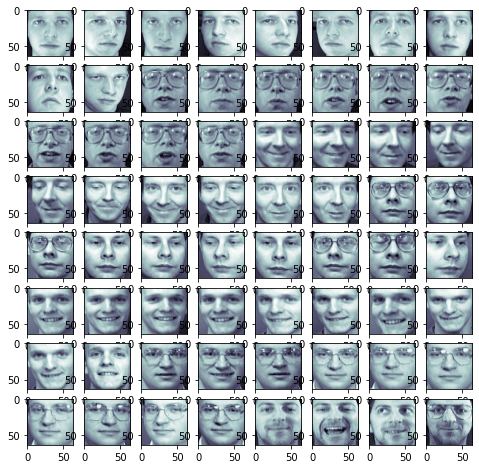

In [ ]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)            # Subplot
    ax.imshow(olive.images[i],cmap = plt.cm.bone)
plt.show()

Now, we will create the PCA obejct and apply PCA

In [ ]:
x = olive.data
y = olive.target
x.shape

(400, 4096)

In [ ]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.components_.shape

(400, 4096)

Now, we will decide the value of 'k' on the basis of amount of variance we want to retain.

In [ ]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k =k + 1
k

123

Thus, by keeping 123 components out of 4096, we shall retain 95% variance.

In [ ]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

### **Reproducing the Images**

We have reduced the number of components from 4096 to 123. Now, lets try to reproduce the images, by getting the approximation from the reduced data.

In [ ]:
# Using inverse_transform to get original data's approximation
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape


(400, 4096)

In [ ]:
x_approx_image = x_approx.reshape((400, 64, 64))

This data will not be the same as the original data, as after applying PCA we lose some of the original data. But lets try and plot these images and see how much difference is achieved.

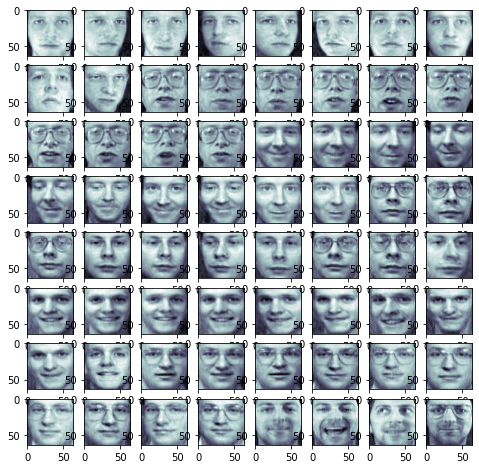

In [ ]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_image[i],cmap=plt.cm.bone)
plt.show()

Wow! These images are still very recoganisable. This tells us that even after reducing the number of components by a huge number, we are able to retain a lot of imformation.

## **Eigenfaces**

Eigenfaces is a method that is useful for face recognition and detection by determining the variance of faces in a collection of face images and use those variances to encode and decode a face in a machine learning way without the full information reducing computation and space complexity.

To view the eigenfaces, we need to draw the components that we obtained after applying PCA, just like we had drawn the images.

In [ ]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [ ]:
eigenfaces = eigenv.reshape((123,64,64))   #Reshaping like an image

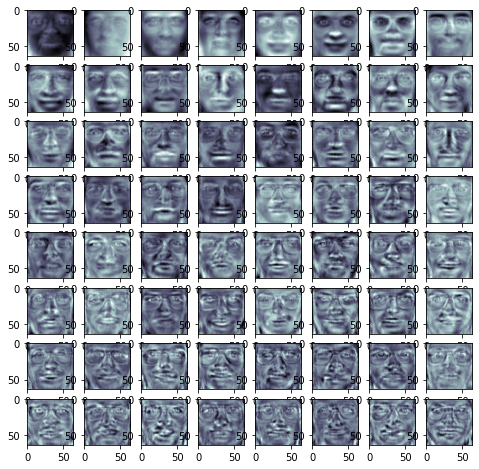

In [ ]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()

The interesting thing to note here is that this data doesnt look random. These components have some meaning attached to them. Each component seems to focus on some particular feature of the person's face

## **Example : Digits Dataset**

Lets perform everything we did for the Olivetti Images on another dataset: **Digit Dataset**

In [ ]:
digits = datasets.load_digits()

In [ ]:
digits.data.shape

(1797, 64)

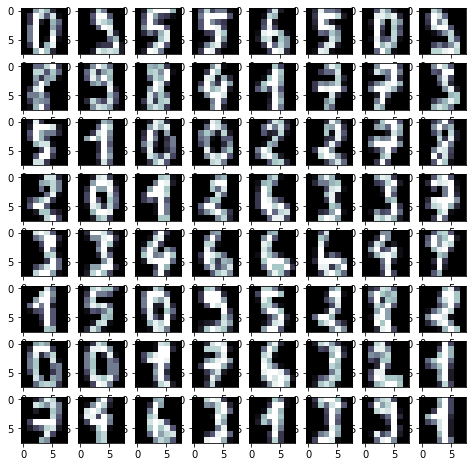

In [ ]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)  # Rows and Columns and image number starting from 1
    ax.imshow(digits.images[i+30], cmap = plt.cm.bone)
plt.show()

In [ ]:
x = digits.data
pca = PCA()
pca.fit(x)
pca.components_.shape    #Min of rows or column

(64, 64)

In [ ]:
k = 0
total = 0
while total < 0.99:
    total += pca.explained_variance_ratio_[k]
    # We may also use the 'explained_variance_ratio_' 
    # instead of finding it ourselves 
    # using the 'explained_variance_'
    k+=1
k

41

In [ ]:
pca2 = PCA(n_components = k, whiten = True) # whiten   True, works eqivalent to feature scaling in these k features
transformed = pca2.fit_transform(x)
transformed.shape

(1797, 41)

In [ ]:
x_approx = pca2.inverse_transform(transformed)
x_approx.shape
x_approx = x_approx.reshape((1797, 8, 8))

x_approx.shape

(1797, 8, 8)

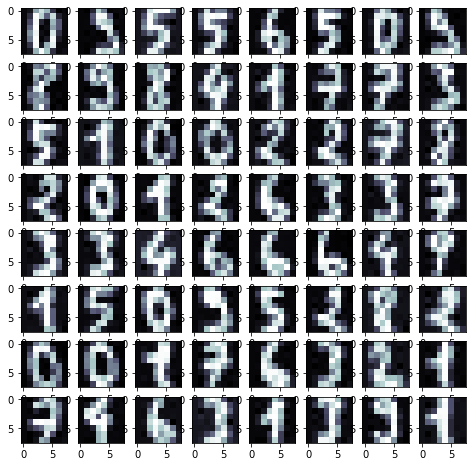

In [ ]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx[i+30], cmap = plt.cm.bone)
plt.show()

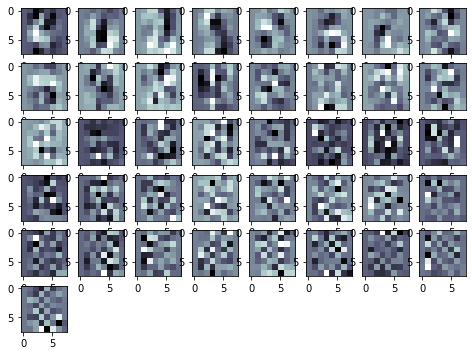

In [ ]:
#eigen faces for digits
eigv = pca2.components_
eigv.shape

eigv = eigv.reshape((41, 8, 8))

fig = plt.figure(figsize = (8, 8))
for i in range(41):
    ax = fig.add_subplot(8, 8, i+1)# rows and columns and image number starting from 1
    ax.imshow(eigv[i], cmap = plt.cm.bone)
plt.show()

## **PCA for Image Compression**

Data volume reduction is a common task in image processing. There is a huge amount of algorithms [1, 2, 4] based on various principles leading to the image compression. Algorithms based on the image colour reduction are mostly lossy but their results are still acceptable for some applications. The image transformation from colour to the gray-level (intensity) image I belongs to the most common algorithms. Its implementation is usually based on the weighted sum of three colour components R, G, B according to relation:

$$I = w1R + w2G + w3B$$ 

The R, G and B matrices contain image colour components, the weights wi were determined with regards to the possibilities of human perception. The PCA method provides an alternative way to this method. The idea is that matrix A is replaced by matrix Al in which only l largest (instead of n) eigenvalues are used for its forming.

True-colour images of size MxN are usually saved in the three-dimensional matrix P with size M x N x 3 which means that the information about intensity of colour components is stored in the 3 given planes. The idea is to apply PCA on the 3rd dimension i.e one containing the information about color in image.

Lets see how we can acheive image compression.

**Step 1:** Loading the Image

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
img = mpimg.imread('https://files.codingninjas.in/naruto-7582.png')
# Loading image in numpy array; 
# you can run the code for your own image also
print(type(img), img.shape)

<class 'numpy.ndarray'> (449, 498, 4)


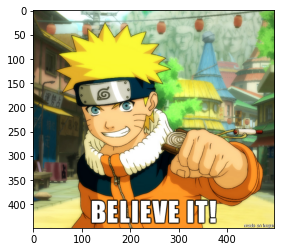

In [ ]:
plt.imshow(img)

In [ ]:
temp = img.copy()
img_shape = img.shape
temp = temp.reshape((img_shape[0]*img_shape[1], 4)) #reshaping the image

In [ ]:
pca = PCA(n_components = 1,whiten = True) #applying PCA
xtr=pca.fit(temp)
xtr=pca.transform(temp)
xtr.shape

(223602, 1)

In [ ]:
xtr=xtr.reshape((img_shape[0],img_shape[1]))

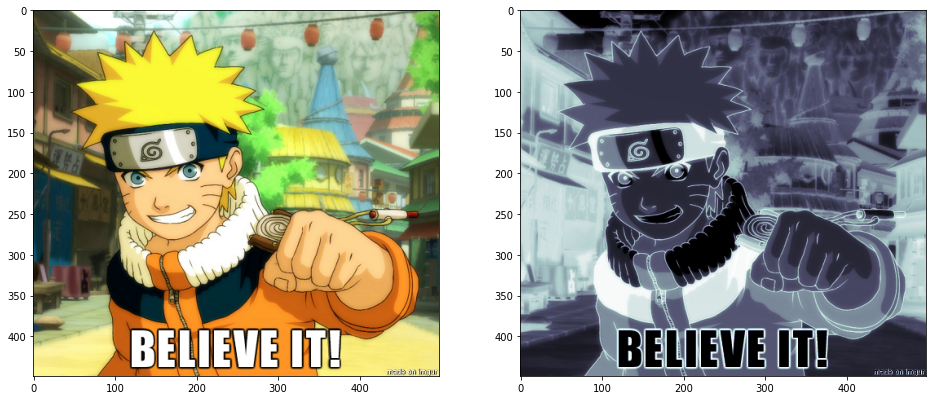

In [ ]:
fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(2,2,1)                      # rows and columns and image number starting from 1
ax.imshow(img,cmap=plt.cm.bone)
ax=fig.add_subplot(2,2,2)
ax.imshow(xtr,cmap=plt.cm.bone)
plt.show()